In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json (r'pizza_request_dataset.json')

In [3]:
df.shape

(5671, 33)

In [4]:
X = df[['post_was_edited','requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval','requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval','requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval','requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval','requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval','requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval','requester_number_of_subreddits_at_request',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval','requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_minus_downvotes_at_retrieval','requester_upvotes_plus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_retrieval','requester_user_flair']]

In [5]:
X = pd.get_dummies(X,prefix=['requester_user_flair'])

In [6]:
X.columns

Index(['post_was_edited', 'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_minus_downvotes_at_retrieval',
       'requester_upvotes_plus_downvotes_at_request',
 

In [1]:
X['num_requester_subreddits_at_request'] = df['requester_subreddits_at_request'].apply(len)

NameError: name 'df' is not defined

In [148]:
X = X.iloc[:, :15]

In [169]:
X

,post_was_edited,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,requester_number_of_comments_in_raop_at_request,requester_number_of_comments_in_raop_at_retrieval,requester_number_of_posts_at_request,...,requester_number_of_subreddits_at_request,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair_PIF,requester_user_flair_shroom,num_requester_subreddits_at_request
0,0,14.416875,531.969722,0.000000,517.511181,8,93,0,4,1,...,8,2,6,32,212,48,610,0,1,8
1,1,11.957060,642.198125,0.000000,630.199398,2,12,0,6,0,...,2,2,6,5,21,13,57,0,1,2
2,1,454.388461,1342.107963,22.915370,910.634873,236,334,1,2,26,...,25,1,4,1359,2110,2423,3456,0,1,25
3,0,141.715625,978.071748,17.156655,853.512778,266,1000,1,2,5,...,56,2,13,1205,4889,2403,8245,0,1,56
4,1366847814,161.699155,387.180231,0.000000,225.439410,38,40,0,2,6,...,3,1,4,81,86,225,232,0,1,3
5,0,289.867222,573.146250,0.000000,283.279028,19,63,0,9,2,...,7,5,34,51,108,89,180,0,1,7
6,1364351254,140.372187,394.616100,0.000000,254.202245,27,58,0,2,0,...,9,1,2,87,648,133,916,0,1,9
7,0,235.988056,805.404583,0.000000,569.374861,39,265,0,2,15,...,16,2,8,145,3220,277,5798,0,1,16
8,0,360.700984,754.754988,0.000000,394.054005,692,911,0,2,14,...,26,6,12,2385,5407,3671,14317,0,1,26
9,1,16.255046,593.539005,0.000000,577.242292,51,113,0,4,13,...,13,3,6,167,482,263,768,0,1,13


In [127]:
features = list(X.columns)
# features

In [109]:
# X[(X.requester_user_flair_shroom == 0) & (X.requester_user_flair_PIF == 0)]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [150]:
X.shape

(5671, 15)

In [73]:
type(X)

numpy.ndarray

In [9]:
Y = df['requester_received_pizza']
Y.shape

(5671,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)

In [11]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
Y_pred = svclassifier.predict(X_test)

In [117]:
coef = svclassifier.coef_[0]
sorted_w = np.argsort(coef)

In [118]:
neg_feat = sorted_w[:5]
pos_feat = sorted_w[-5:]

In [128]:
for idx in pos_feat:
    print(features[idx])

requester_days_since_first_post_on_raop_at_retrieval
requester_upvotes_plus_downvotes_at_retrieval
requester_upvotes_minus_downvotes_at_request
requester_user_flair_PIF
requester_user_flair_shroom


In [129]:
for idx in neg_feat:
    print(features[idx])

requester_upvotes_plus_downvotes_at_request
requester_upvotes_minus_downvotes_at_retrieval
requester_number_of_posts_at_request
requester_account_age_in_days_at_retrieval
number_of_downvotes_of_request_at_retrieval


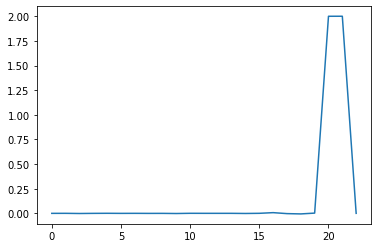

In [132]:
plt.plot(np.arange(len(features)), coef)

In [133]:
pos_feat

array([ 4, 19, 16, 20, 21])

In [134]:
neg_feat

array([18, 17,  9,  2, 14])

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
#metrics = classification_report(Y_test,Y_pred,average='weighted')
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[427   0]
 [  0 141]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       427
        True       1.00      1.00      1.00       141

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568



In [67]:
Y_test.shape

(568,)

In [35]:
df['requester_user_flair'].unique()

array(['shroom', 'PIF', None], dtype=object)

In [68]:
Y_pred

array([False,  True, False,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [163]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred)

0.06896551724137931

In [164]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.5168201103452902